In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import math

In [2]:
state1 = (pd.read_csv("datasets/state1_datasets/state1_acceleration_timehistory2.csv", index_col = "Time"))['m3'].values
force_df = (pd.read_csv("datasets/force_dataframe.csv", index_col = "Time"))['F2'].values

<IPython.core.display.Javascript object>


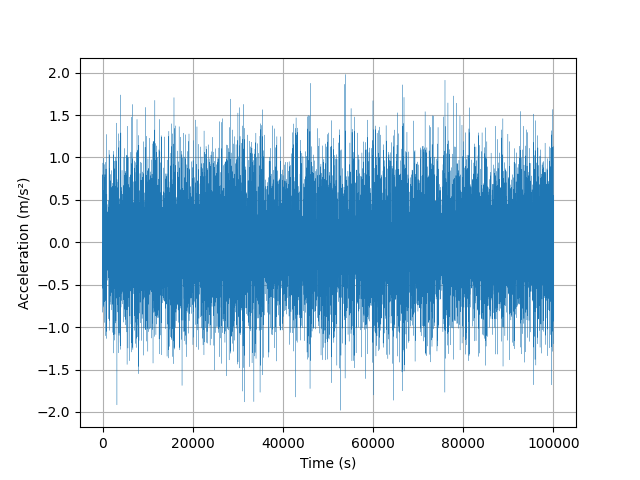

In [3]:
fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)
ax.plot(state1, label = "Acceleration", linewidth = 0.2)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Acceleration (m/s²)")
ax.grid(True)

In [4]:
#from statsmodels.tsa.stattools import adfuller

#st_test = adfuller(state1, autolag="AIC")
#print("P-Value : ", st_test[1])

<IPython.core.display.Javascript object>


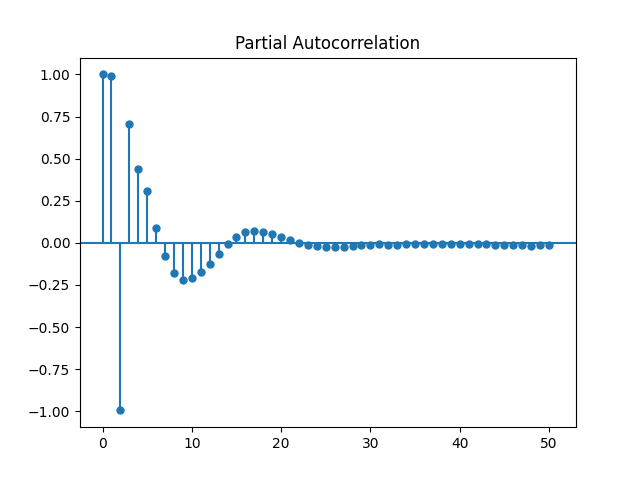

<IPython.core.display.Javascript object>


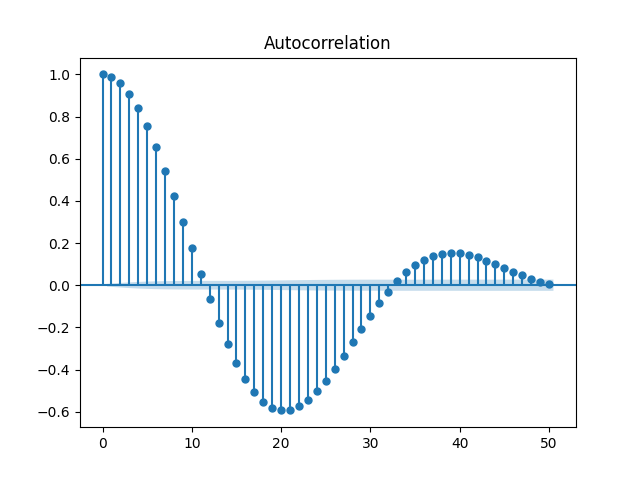

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pacf = plot_pacf(state1, lags = 50, method = "ywm")
acf = plot_acf(state1, lags = 50)


In [6]:
p = 20

In [7]:
train = (state1)
test = (state1)[len(state1)-50:]

In [8]:
# AR Model
from statsmodels.tsa.ar_model import AutoReg

ARmodel = AutoReg(train, lags = p).fit()
print(ARmodel.summary())

C:\Users\ROYAL\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:               100001
Model:                    AutoReg(20)   Log Likelihood              469498.674
Method:               Conditional MLE   S.D. of innovations              0.002
Date:                Fri, 02 Jul 2021   AIC                            -12.229
Time:                        18:51:08   BIC                            -12.227
Sample:                            20   HQIC                           -12.229
                               100001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.038e-06   6.99e-06     -0.148      0.882   -1.47e-05    1.27e-05
y.L1           2.7307      0.003    864.465      0.000       2.724       2.737
y.L2          -2.9183      0.009   -318.183      0.0

<IPython.core.display.Javascript object>


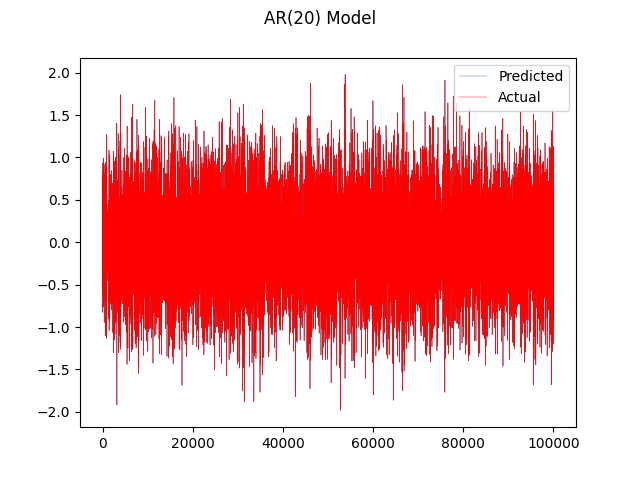

In [9]:
ARpred = ARmodel.predict()
fig2 = plt.figure()
fig2.suptitle(f"AR({p}) Model")
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(ARpred, label = "Predicted", linewidth = 0.3)
ax2.plot(state1, color = 'r', label = "Actual", linewidth = 0.3)
ax2.legend()
plt.show()

In [10]:
# RMSE
import sklearn.metrics
rmse = math.sqrt(sklearn.metrics.mean_squared_error(state1[p:], ARpred))
print(rmse)


0.0022098790504585337


C:\Users\ROYAL\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<IPython.core.display.Javascript object>


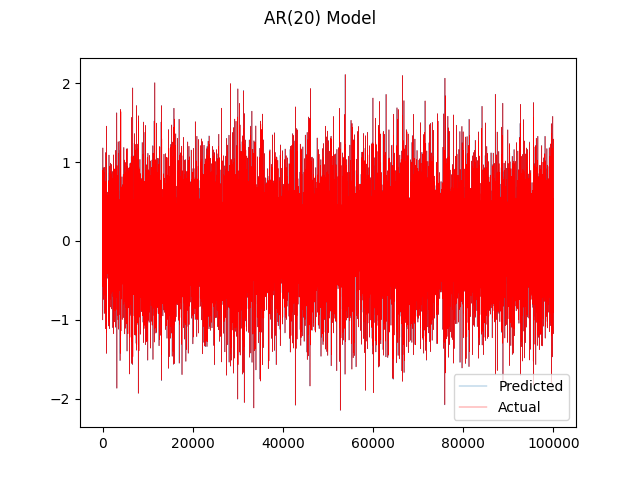

In [11]:
state4 = (pd.read_csv("datasets/state4_datasets/state4_acceleration_timehistory2.csv", index_col = "Time"))['m3'].values
AR4 = AutoReg(state4, lags = p)
AR4pred = AR4.predict(params = ARmodel.params)

fig3 = plt.figure()
fig3.suptitle(f"AR({p}) Model")
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(AR4pred, label = "Predicted", linewidth = 0.3)
ax3.plot(state4, color = 'r', label = "Actual", linewidth = 0.3)
ax3.legend()
plt.show()

In [12]:
rmse4 = math.sqrt(sklearn.metrics.mean_squared_error(state4[p:], AR4pred))
print(rmse4)

0.0022696967278698276


<IPython.core.display.Javascript object>


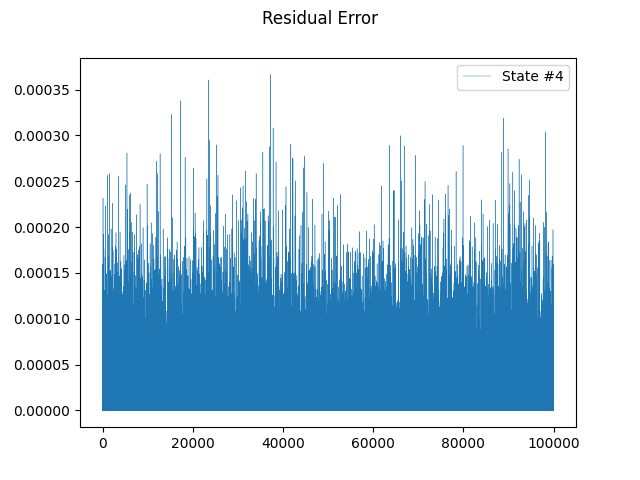

In [13]:
fig4 = plt.figure()
fig4.suptitle(f"Residual Error")
ax4 = fig4.add_subplot(1,1,1)
ax4.plot((AR4pred - state4[p:] - ARmodel.resid)**2, label = "State #4", linewidth = 0.3)
#ax4.plot(ARmodel.resid, color = 'r', label = "State #1", linewidth = 0.3)
ax4.legend()
plt.show()

In [14]:
state1 = (pd.read_csv("datasets/state1_datasets/state1_acceleration_timehistory2.csv", index_col = "Time"))['m3'].values
AR1 = AutoReg(state1, lags = p).fit()
AR1pred = AR1.predict()
rmss1 = np.sqrt(np.mean((AR1pred - state1[p:])**2))
rmss1

C:\Users\ROYAL\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


0.0022098790504585337

In [15]:
AR1.params - ARmodel.params

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [16]:
state2 = (pd.read_csv("datasets/state2_datasets/state2_acceleration_timehistory2.csv", index_col = "Time"))['m3'].values
AR2 = AutoReg(state2, lags = p)
AR2pred = AR2.predict(params = ARmodel.params)
rmss2 = np.sqrt(np.mean((AR2pred - state2[p:])**2))
rmss2

C:\Users\ROYAL\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


0.0022231219711993442

In [17]:
state3 = (pd.read_csv("datasets/state3_datasets/state3_acceleration_timehistory2.csv", index_col = "Time"))['m3'].values
AR3 = AutoReg(state3, lags = p)
AR3pred = AR3.predict(params = ARmodel.params)
rmss3 = np.sqrt(np.mean((AR3pred - state3[p:])**2))
rmss3

C:\Users\ROYAL\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


0.0022374382048100582

In [18]:
state4 = (pd.read_csv("datasets/state4_datasets/state4_acceleration_timehistory2.csv", index_col = "Time"))['m3'].values
AR4 = AutoReg(state4, lags = p)
AR4pred = AR4.predict(params = ARmodel.params)
rmss4 = np.sqrt(np.mean((AR4pred - state4[p:])**2))
rmss4

C:\Users\ROYAL\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


0.0022696967278698276

In [19]:
state5 = (pd.read_csv("datasets/state5_datasets/state5_acceleration_timehistory2.csv", index_col = "Time"))['m3'].values
AR5 = AutoReg(state5, lags = p)
AR5pred = AR5.predict(params = ARmodel.params)
rmss5 = np.sqrt(np.mean((AR5pred - state5[p:])**2))
rmss5

C:\Users\ROYAL\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


0.002408454455605911

In [20]:
np.std(ARmodel.resid)

0.0022098790504585337

In [21]:
np.std(ARpred - state1[p:])

0.0022098790504585337

In [22]:
np.std(AR2pred - state2[p:])

0.002223121971195877

In [23]:
np.std(AR3pred - state3[p:])

0.002237438204768649

In [24]:
np.std(AR4pred - state4[p:])

0.0022696967274809785

In [25]:
np.std(AR5pred - state5[p:])

0.0024084544515077565

In [26]:
AR

NameError: name 'AR' is not defined